In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
data = pd.read_csv(r"D:\datasets\adult_with_headers.csv")
data.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
data.shape

(32561, 15)

In [4]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

In [5]:
print("Summary Statistics:")
data.describe()

Summary Statistics:


,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [6]:
print("\nData Types:")
print(data.dtypes)


Data Types:
age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
income            object
dtype: object


In [7]:
print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64


In [8]:
# For numerical columns, replace missing values with mean
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns
data[numerical_cols] = data[numerical_cols].fillna(data[numerical_cols].mean())

In [9]:
# For numerical columns, replace missing values with mean
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns
data[numerical_cols] = data[numerical_cols].fillna(data[numerical_cols].mean())

In [10]:
# Check if missing values are handled
print("Missing values after imputation:")
print(data.isnull().sum())

Missing values after imputation:
age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64


In [11]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Select numerical columns
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns

# Standard Scaling
scaler_standard = StandardScaler()
data_standard_scaled = data.copy()
data_standard_scaled[numerical_cols] = scaler_standard.fit_transform(data[numerical_cols])

In [12]:
# Min-Max Scaling
scaler_minmax = MinMaxScaler()
data_minmax_scaled = data.copy()
data_minmax_scaled[numerical_cols] = scaler_minmax.fit_transform(data[numerical_cols])

# Display scaled data
print("Data after Standard Scaling:")
print(data_standard_scaled.head())

print("\nData after Min-Max Scaling:")
print(data_minmax_scaled.head())

Data after Standard Scaling:
        age          workclass    fnlwgt   education  education_num  \
0  0.030671          State-gov -1.063611   Bachelors       1.134739   
1  0.837109   Self-emp-not-inc -1.008707   Bachelors       1.134739   
2 -0.042642            Private  0.245079     HS-grad      -0.420060   
3  1.057047            Private  0.425801        11th      -1.197459   
4 -0.775768            Private  1.408176   Bachelors       1.134739   

        marital_status          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   capital_gain  capital_loss  hours_per_week  native_country  income

In [13]:
# Define categorical columns
categorical_cols = data.select_dtypes(include=['object']).columns

# Select categorical columns with less than 5 categories
categorical_cols_less_than_5 = [col for col in categorical_cols if data[col].nunique() < 5]

# Apply One-Hot Encoding
data_encoded = pd.get_dummies(data, columns=categorical_cols_less_than_5, drop_first=True)

# Display encoded data
print("Data after One-Hot Encoding:")
print(data_encoded.head())

Data after One-Hot Encoding:
   age          workclass  fnlwgt   education  education_num  \
0   39          State-gov   77516   Bachelors             13   
1   50   Self-emp-not-inc   83311   Bachelors             13   
2   38            Private  215646     HS-grad              9   
3   53            Private  234721        11th              7   
4   28            Private  338409   Bachelors             13   

        marital_status          occupation    relationship    race  \
0        Never-married        Adm-clerical   Not-in-family   White   
1   Married-civ-spouse     Exec-managerial         Husband   White   
2             Divorced   Handlers-cleaners   Not-in-family   White   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black   
4   Married-civ-spouse      Prof-specialty            Wife   Black   

   capital_gain  capital_loss  hours_per_week  native_country  sex_ Male  \
0          2174             0              40   United-States          1   
1            

In [14]:
from sklearn.preprocessing import LabelEncoder

# Select categorical columns with more than 5 categories
categorical_cols_more_than_5 = [col for col in categorical_cols if data[col].nunique() > 5]

# Apply Label Encoding
label_encoder = LabelEncoder()
data_encoded = data.copy()
for col in categorical_cols_more_than_5:
    data_encoded[col] = label_encoder.fit_transform(data[col])

# Display encoded data
print("Data after Label Encoding:")
print(data_encoded.head())

Data after Label Encoding:
   age  workclass  fnlwgt  education  education_num  marital_status  \
0   39          7   77516          9             13               4   
1   50          6   83311          9             13               2   
2   38          4  215646         11              9               0   
3   53          4  234721          1              7               2   
4   28          4  338409          9             13               2   

   occupation  relationship    race      sex  capital_gain  capital_loss  \
0           1             1   White     Male          2174             0   
1           4             0   White     Male             0             0   
2           6             1   White     Male             0             0   
3           6             0   Black     Male             0             0   
4          10             5   Black   Female             0             0   

   hours_per_week  native_country  income  
0              40              39   <=50K  
1

#### One-Hot Encoding:

#### Pros:

Maintains independence: One-hot encoding creates binary columns for each category, ensuring that no ordinal relationship is assumed between categories. This is useful for categorical variables where no inherent order exists.
Preserves information: Each category is represented by its own binary column, preserving all the information present in the original categorical variable.
Compatible with most algorithms: One-hot encoded features are generally accepted by most machine learning algorithms.

#### Cons:

Dimensionality: One-hot encoding can greatly increase the dimensionality of the dataset, especially if the categorical variable has many unique categories. This can lead to the curse of dimensionality and computational inefficiency.
Collinearity: The presence of many one-hot encoded columns can introduce multicollinearity, which might affect the performance of certain algorithms, such as linear models.
Sparse matrices: The resulting encoded matrix is often sparse, with mostly zeros, which can consume a lot of memory and computational resources.

#### Label Encoding:

Pros:

Compact representation: Label encoding replaces categories with integers, resulting in a more compact representation compared to one-hot encoding, especially for categorical variables with many unique categories.
Preserves order: Label encoding preserves the ordinal relationship between categories, which might be desirable for certain categorical variables where such an order exists.
Reduced dimensionality: Label encoding reduces the dimensionality of the dataset compared to one-hot encoding, which can be beneficial for memory and computational efficiency.

Cons:

Arbitrary values: The integers assigned to categories are arbitrary and do not necessarily reflect any meaningful relationship between categories. This might mislead algorithms that assume ordinal relationships.
Potential bias: Algorithms might interpret the encoded integers as meaningful features, even though they are just placeholders. This can introduce bias in the model's predictions.
Not suitable for all algorithms: Some algorithms might not perform well with label encoded features, especially those that assume ordinality or have a notion of distance between categories (e.g., KNN).

In [15]:
# Convert 'income' and 'hours_per_week' to numeric type
data['income'] = pd.to_numeric(data['income'], errors='coerce')
data['hours_per_week'] = pd.to_numeric(data['hours_per_week'], errors='coerce')

# Create new feature: Income-to-Hours Ratio
data['income_to_hours_ratio'] = data['income'] / data['hours_per_week']

# Create new feature: Education Level Weighted by Education Years
data['education_level_weighted'] = data['education_num'] * data['education_num']

# Display the first few rows of the dataset with new features
print("Dataset with new features:")
print(data.head())

Dataset with new features:
   age          workclass  fnlwgt   education  education_num  \
0   39          State-gov   77516   Bachelors             13   
1   50   Self-emp-not-inc   83311   Bachelors             13   
2   38            Private  215646     HS-grad              9   
3   53            Private  234721        11th              7   
4   28            Private  338409   Bachelors             13   

        marital_status          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   capital_gain  capital_loss  hours_per_week  native_country  income  \
0          2174             0           

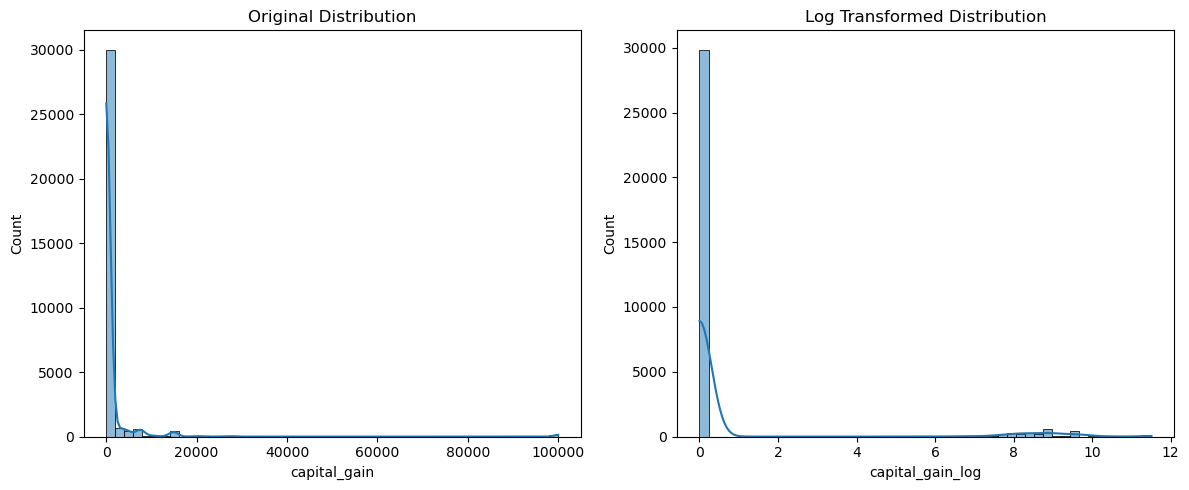

In [16]:
import numpy as np

# Apply log transformation to 'capital_gain'
data['capital_gain_log'] = np.log1p(data['capital_gain'])

# Display the distribution of 'capital_gain' before and after transformation
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 5))

# Plot original distribution
plt.subplot(1, 2, 1)
sns.histplot(data['capital_gain'], bins=50, kde=True)
plt.title('Original Distribution')

# Plot distribution after log transformation
plt.subplot(1, 2, 2)
sns.histplot(data['capital_gain_log'], bins=50, kde=True)
plt.title('Log Transformed Distribution')

plt.tight_layout()
plt.show()

In [26]:
from sklearn.ensemble import IsolationForest
from sklearn.impute import SimpleImputer

# Instantiate SimpleImputer with strategy='mean'
imputer = SimpleImputer(strategy='mean')

# Fit and transform the imputer on the numerical columns
data_imputed = imputer.fit_transform(data.select_dtypes(include=['int64', 'float64']))

# Apply Isolation Forest
iso_forest = IsolationForest(contamination=0.05, random_state=42)
outlier_preds = iso_forest.fit_predict(data_imputed)

In [27]:
import ppscore as pps
import pandas as pd

# Assuming 'data' is your DataFrame containing the dataset


# Compare with the correlation matrix
correlation_matrix = data.corr()

# Display the correlation matrix
print("\nCorrelation Matrix:")
print(correlation_matrix)


Correlation Matrix:
                               age    fnlwgt  education_num  capital_gain  \
age                       1.000000 -0.076646       0.036527      0.077674   
fnlwgt                   -0.076646  1.000000      -0.043195      0.000432   
education_num             0.036527 -0.043195       1.000000      0.122630   
capital_gain              0.077674  0.000432       0.122630      1.000000   
capital_loss              0.057775 -0.010252       0.079923     -0.031615   
hours_per_week            0.068756 -0.018768       0.148123      0.078409   
income                         NaN       NaN            NaN           NaN   
income_to_hours_ratio          NaN       NaN            NaN           NaN   
education_level_weighted  0.069002 -0.036462       0.978415      0.138662   
capital_gain_log          0.124183 -0.004414       0.129135      0.564520   

                          capital_loss  hours_per_week  income  \
age                           0.057775        0.068756     NaN   

C:\Users\RAHUL\AppData\Local\Temp\ipykernel_2240\939986905.py:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()
